In [1]:
# Cài đặt các thư viện cần thiết
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!python --version

Python 3.11.12


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

# LOADING DATASET

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Phising-DataSet/dataset_phishing.csv')
df.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [6]:
#Gán nhãn cho dataset với "phishing = 1", "legitimate = 0"
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [7]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [8]:
Y1 = df['labels']
X1 = df.drop(columns = ['url','labels','status'])

In [9]:
X1.head(2)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2


In [10]:
Y1.head(2)

,labels
0,0
1,1


In [11]:
#Dữ liệu huấn luyện ko có đặc trưng

X2 = df['url']
X2.head(2)

,url
0,http://www.crestonwood.com/router.php
1,http://shadetreetechnology.com/V4/validation/a...


# CREATING DATASET WITH PRIOR FEATURE EXTRACTION

In [12]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [13]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(9144, 87, 1)

# CREATING DATASET WITHOUT PRIOR FEATURE EXTRACTION

In [14]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
6430 / 11430
6431 / 11430
6432 / 11430
6433 / 11430
6434 / 11430
6435 / 11430
6436 / 11430
6437 / 11430
6438 / 11430
6439 / 11430
6440 / 11430
6441 / 11430
6442 / 11430
6443 / 11430
6444 / 11430
6445 / 11430
6446 / 11430
6447 / 11430
6448 / 11430
6449 / 11430
6450 / 11430
6451 / 11430
6452 / 11430
6453 / 11430
6454 / 11430
6455 / 11430
6456 / 11430
6457 / 11430
6458 / 11430
6459 / 11430
6460 / 11430
6461 / 11430
6462 / 11430
6463 / 11430
6464 / 11430
6465 / 11430
6466 / 11430
6467 / 11430
6468 / 11430
6469 / 11430
6470 / 11430
6471 / 11430
6472 / 11430
6473 / 11430
6474 / 11430
6475 / 11430
6476 / 11430
6477 / 11430
6478 / 11430
6479 / 11430
6480 / 11430
6481 / 11430
6482 / 11430
6483 / 11430
6484 / 11430
6485 / 11430
6486 / 11430
6487 / 11430
6488 / 11430
6489 / 11430
6490 / 11430
6491 / 11430
6492 / 11430
6493 / 11430
6494 / 11430
6495 / 11430
6496 / 11430
6497 / 11430
6498 / 11430
6499 / 11430
6500 / 11430
6501 / 11430
6502 / 

In [16]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [18]:
import joblib
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()
joblib.dump(cv, "tfidf_vectorizer.pkl") #Cần tải về để phục vụ cho việc dự đoán

['tfidf_vectorizer.pkl']

In [ ]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [ ]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [ ]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((87, 1), (1000, 1))

# Evaluation Helper Functions

In [ ]:
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()

    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [ ]:
def conf_matrix(X_test,Y_test,model):

    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

# CNN MODEL

In [ ]:
from keras import Sequential

def CNN(input_size):

    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))

    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 87, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 87, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 87, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 44, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 44, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 44, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 44, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 22, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 11, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 6, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 3, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 527,329 (2.01 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 992 (3.88 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 1000, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1000, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1000, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 500, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 500, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 500, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 250, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 250, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 125, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 125, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 125, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 63, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 63, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 63, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,328,417 (16.51 MB)

 Trainable params: 4,327,425 (16.51 MB)

 Non-trainable params: 992 (3.88 KB)

# CNN MODEL ON FIRST DATASET

In [ ]:
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5782 - loss: 0.8803
Epoch 1: val_loss improved from inf to 0.70143, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 19s 116ms/step - accuracy: 0.5796 - loss: 0.8780 - val_accuracy: 0.4964 - val_loss: 0.7014
Epoch 2/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7051 - loss: 0.6213
Epoch 2: val_loss improved from 0.70143 to 0.68831, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7052 - loss: 0.6206 - val_accuracy: 0.5232 - val_loss: 0.6883
Epoch 3/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.7527 - loss: 0.5402
Epoch 3: val_loss improved from 0.68831 to 0.68434, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.7525 - loss: 0.5402 - val_accuracy: 0.5309 - val_loss: 0.6843
Epoch 4/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7123 - loss: 0.5655
Epoch 4: val_loss did not improve from 0.68434
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7134 - loss: 0.5643 - val_accuracy: 0.4964 - val_loss: 0.6886
Epoch 5/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7764 - loss: 0.4722
Epoch 5: val_loss did not improve from 0.68434
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.7764 - loss: 0.4725 - val_accuracy: 0.4992 - val_loss: 0.7730
Epoch 6/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7912 - loss: 0.4584
Epoch 6: val_loss did not improve from 0.68434
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7913 - loss: 0.4582 - val_accuracy: 0.5358 - val_loss: 0.9183
Epoch 7/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7979 - loss: 0.4448
Epoch 7: val_loss did not improve from 0.68434
58/

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8071 - loss: 0.4242 - val_accuracy: 0.5899 - val_loss: 0.6662
Epoch 10/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8171 - loss: 0.4058
Epoch 10: val_loss did not improve from 0.66625
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8173 - loss: 0.4055 - val_accuracy: 0.5806 - val_loss: 0.8062
Epoch 11/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8248 - loss: 0.3963
Epoch 11: val_loss improved from 0.66625 to 0.48783, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.8248 - loss: 0.3962 - val_accuracy: 0.7512 - val_loss: 0.4878
Epoch 12/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8252 - loss: 0.4098
Epoch 12: val_loss improved from 0.48783 to 0.44323, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8253 - loss: 0.4093 - val_accuracy: 0.7993 - val_loss: 0.4432
Epoch 13/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8349 - loss: 0.3796
Epoch 13: val_loss did not improve from 0.44323
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.8349 - loss: 0.3797 - val_accuracy: 0.7545 - val_loss: 0.4860
Epoch 14/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8361 - loss: 0.3834
Epoch 14: val_loss did not improve from 0.44323
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.8361 - loss: 0.3834 - val_accuracy: 0.7649 - val_loss: 0.4928
Epoch 15/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8407 - loss: 0.3662
Epoch 15: val_loss improved from 0.44323 to 0.37123, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.8406 - loss: 0.3665 - val_accuracy: 0.8414 - val_loss: 0.3712
Epoch 16/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8382 - loss: 0.3719
Epoch 16: val_loss did not improve from 0.37123
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8383 - loss: 0.3718 - val_accuracy: 0.8037 - val_loss: 0.4128
Epoch 17/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8411 - loss: 0.3642
Epoch 17: val_loss did not improve from 0.37123
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8409 - loss: 0.3644 - val_accuracy: 0.8311 - val_loss: 0.3874
Epoch 18/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8456 - loss: 0.3638
Epoch 18: val_loss improved from 0.37123 to 0.33690, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.8455 - loss: 0.3639 - val_accuracy: 0.8606 - val_loss: 0.3369
Epoch 19/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8414 - loss: 0.3601
Epoch 19: val_loss did not improve from 0.33690
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.8414 - loss: 0.3602 - val_accuracy: 0.8119 - val_loss: 0.4095
Epoch 20/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8427 - loss: 0.3688
Epoch 20: val_loss did not improve from 0.33690
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8429 - loss: 0.3684 - val_accuracy: 0.8524 - val_loss: 0.3594
Epoch 21/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8514 - loss: 0.3595
Epoch 21: val_loss did not improve from 0.33690
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8514 - loss: 0.3592 - val_accuracy: 0.8524 - val_loss: 0.3374
Epoch 22/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8425 - loss: 0.3733
Epoch 22: val_loss did not improve from 0

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8464 - loss: 0.3512 - val_accuracy: 0.8568 - val_loss: 0.3334
Epoch 26/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8516 - loss: 0.3372
Epoch 26: val_loss did not improve from 0.33340
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.8515 - loss: 0.3373 - val_accuracy: 0.8595 - val_loss: 0.3433
Epoch 27/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8524 - loss: 0.3563
Epoch 27: val_loss did not improve from 0.33340
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8525 - loss: 0.3561 - val_accuracy: 0.8026 - val_loss: 0.4567
Epoch 28/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8469 - loss: 0.3509
Epoch 28: val_loss improved from 0.33340 to 0.32605, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8472 - loss: 0.3505 - val_accuracy: 0.8655 - val_loss: 0.3261
Epoch 29/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8545 - loss: 0.3446
Epoch 29: val_loss did not improve from 0.32605
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8545 - loss: 0.3446 - val_accuracy: 0.6987 - val_loss: 0.6301
Epoch 30/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8584 - loss: 0.3423
Epoch 30: val_loss did not improve from 0.32605
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.8583 - loss: 0.3422 - val_accuracy: 0.7403 - val_loss: 0.5942
Epoch 31/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8498 - loss: 0.3409
Epoch 31: val_loss did not improve from 0.32605
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.8500 - loss: 0.3408 - val_accuracy: 0.8535 - val_loss: 0.3336
Epoch 32/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8578 - loss: 0.3328
Epoch 32: val_loss did not improve from 0.

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.8636 - loss: 0.3282 - val_accuracy: 0.8835 - val_loss: 0.2833
Epoch 36/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8623 - loss: 0.3251 
Epoch 36: val_loss did not improve from 0.28326
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.8623 - loss: 0.3252 - val_accuracy: 0.8770 - val_loss: 0.2893
Epoch 37/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8587 - loss: 0.3322
Epoch 37: val_loss did not improve from 0.28326
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.8588 - loss: 0.3320 - val_accuracy: 0.8371 - val_loss: 0.3720
Epoch 38/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8665 - loss: 0.3207
Epoch 38: val_loss did not improve from 0.28326
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8664 - loss: 0.3208 - val_accuracy: 0.8704 - val_loss: 0.3136
Epoch 39/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8681 - loss: 0.3225
Epoch 39: val_loss did not improve from 

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.8672 - loss: 0.3224 - val_accuracy: 0.8874 - val_loss: 0.2774
Epoch 46/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8605 - loss: 0.3288
Epoch 46: val_loss did not improve from 0.27736
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8607 - loss: 0.3284 - val_accuracy: 0.8403 - val_loss: 0.3776
Epoch 47/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8608 - loss: 0.3148
Epoch 47: val_loss did not improve from 0.27736
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8609 - loss: 0.3149 - val_accuracy: 0.6889 - val_loss: 0.6706
Epoch 48/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8693 - loss: 0.3076
Epoch 48: val_loss did not improve from 0.27736
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8693 - loss: 0.3078 - val_accuracy: 0.7999 - val_loss: 0.4313
Epoch 49/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8625 - loss: 0.3237
Epoch 49: val_loss improved from 0.27736 t

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8627 - loss: 0.3234 - val_accuracy: 0.8879 - val_loss: 0.2715
Epoch 50/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8625 - loss: 0.3146
Epoch 50: val_loss did not improve from 0.27148
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.8628 - loss: 0.3142 - val_accuracy: 0.7972 - val_loss: 0.4786
Epoch 51/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8786 - loss: 0.2965
Epoch 51: val_loss did not improve from 0.27148
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.8784 - loss: 0.2968 - val_accuracy: 0.8792 - val_loss: 0.3139
Epoch 52/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8798 - loss: 0.2904
Epoch 52: val_loss did not improve from 0.27148
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.8796 - loss: 0.2908 - val_accuracy: 0.8846 - val_loss: 0.3100
Epoch 53/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8747 - loss: 0.2932
Epoch 53: val_loss did not improve from 

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8747 - loss: 0.2982 - val_accuracy: 0.8961 - val_loss: 0.2700
Epoch 55/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8807 - loss: 0.2893
Epoch 55: val_loss did not improve from 0.27004
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8804 - loss: 0.2898 - val_accuracy: 0.8075 - val_loss: 0.4345
Epoch 56/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8776 - loss: 0.3077
Epoch 56: val_loss did not improve from 0.27004
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8774 - loss: 0.3078 - val_accuracy: 0.7824 - val_loss: 0.5233
Epoch 57/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8782 - loss: 0.3091
Epoch 57: val_loss did not improve from 0.27004
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8782 - loss: 0.3090 - val_accuracy: 0.7808 - val_loss: 0.5339
Epoch 58/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8782 - loss: 0.2961
Epoch 58: val_loss improved from 0.27004 

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8781 - loss: 0.2962 - val_accuracy: 0.8934 - val_loss: 0.2600
Epoch 59/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8756 - loss: 0.3026
Epoch 59: val_loss did not improve from 0.25995
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.8757 - loss: 0.3026 - val_accuracy: 0.8486 - val_loss: 0.3790
Epoch 60/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8769 - loss: 0.3000
Epoch 60: val_loss did not improve from 0.25995
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8768 - loss: 0.3002 - val_accuracy: 0.8562 - val_loss: 0.3592
Epoch 61/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8694 - loss: 0.3108
Epoch 61: val_loss did not improve from 0.25995
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.8695 - loss: 0.3107 - val_accuracy: 0.7961 - val_loss: 0.4661
Epoch 62/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8743 - loss: 0.3033
Epoch 62: val_loss did not improve from 0.2

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.8750 - loss: 0.2982 - val_accuracy: 0.8901 - val_loss: 0.2568
Epoch 65/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8763 - loss: 0.2928
Epoch 65: val_loss did not improve from 0.25683
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.8764 - loss: 0.2928 - val_accuracy: 0.8311 - val_loss: 0.3705
Epoch 66/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8829 - loss: 0.2891
Epoch 66: val_loss did not improve from 0.25683
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8828 - loss: 0.2891 - val_accuracy: 0.8469 - val_loss: 0.3671
Epoch 67/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8698 - loss: 0.3112
Epoch 67: val_loss improved from 0.25683 to 0.25194, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8698 - loss: 0.3109 - val_accuracy: 0.8950 - val_loss: 0.2519
Epoch 68/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8818 - loss: 0.2875
Epoch 68: val_loss did not improve from 0.25194
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8817 - loss: 0.2875 - val_accuracy: 0.8650 - val_loss: 0.3271
Epoch 69/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8803 - loss: 0.2924
Epoch 69: val_loss did not improve from 0.25194
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.8803 - loss: 0.2922 - val_accuracy: 0.8885 - val_loss: 0.2942
Epoch 70/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8827 - loss: 0.2858
Epoch 70: val_loss did not improve from 0.25194
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8825 - loss: 0.2861 - val_accuracy: 0.8999 - val_loss: 0.2579
Epoch 71/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8778 - loss: 0.3030
Epoch 71: val_loss did not improve from 0.2

58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.8823 - loss: 0.2837 - val_accuracy: 0.9005 - val_loss: 0.2435
Epoch 81/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8784 - loss: 0.2968
Epoch 81: val_loss did not improve from 0.24354
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8785 - loss: 0.2966 - val_accuracy: 0.8934 - val_loss: 0.2676
Epoch 82/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8784 - loss: 0.2882
Epoch 82: val_loss did not improve from 0.24354
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - accuracy: 0.8786 - loss: 0.2880 - val_accuracy: 0.8863 - val_loss: 0.2993
Epoch 83/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8782 - loss: 0.2939
Epoch 83: val_loss did not improve from 0.24354
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.8782 - loss: 0.2939 - val_accuracy: 0.8967 - val_loss: 0.2727
Epoch 84/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8777 - loss: 0.2905
Epoch 84: val_loss did not improve from 0.

58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8834 - loss: 0.2811 - val_accuracy: 0.9087 - val_loss: 0.2392
Epoch 98/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8893 - loss: 0.2708
Epoch 98: val_loss did not improve from 0.23915
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8893 - loss: 0.2709 - val_accuracy: 0.8830 - val_loss: 0.3097
Epoch 99/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8923 - loss: 0.2659
Epoch 99: val_loss did not improve from 0.23915
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8922 - loss: 0.2661 - val_accuracy: 0.6862 - val_loss: 0.8032
Epoch 100/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8825 - loss: 0.2758
Epoch 100: val_loss did not improve from 0.23915
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8828 - loss: 0.2756 - val_accuracy: 0.9043 - val_loss: 0.2396
Epoch 101/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8927 - loss: 0.2675
Epoch 101: val_loss did not improve from

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.8858 - loss: 0.2716 - val_accuracy: 0.9076 - val_loss: 0.2371
Epoch 114/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8951 - loss: 0.2609
Epoch 114: val_loss did not improve from 0.23707
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8951 - loss: 0.2608 - val_accuracy: 0.8201 - val_loss: 0.4233
Epoch 115/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8958 - loss: 0.2571
Epoch 115: val_loss did not improve from 0.23707
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8957 - loss: 0.2575 - val_accuracy: 0.8283 - val_loss: 0.3929
Epoch 116/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8931 - loss: 0.2625
Epoch 116: val_loss did not improve from 0.23707
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8930 - loss: 0.2627 - val_accuracy: 0.9010 - val_loss: 0.2507
Epoch 117/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.8911 - loss: 0.2624
Epoch 117: val_loss did not imp

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8948 - loss: 0.2592 - val_accuracy: 0.9131 - val_loss: 0.2320
Epoch 127/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8875 - loss: 0.2615
Epoch 127: val_loss did not improve from 0.23198
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.8876 - loss: 0.2615 - val_accuracy: 0.9071 - val_loss: 0.2507
Epoch 128/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.8955 - loss: 0.2615
Epoch 128: val_loss did not improve from 0.23198
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - accuracy: 0.8954 - loss: 0.2616 - val_accuracy: 0.8486 - val_loss: 0.3483
Epoch 129/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8987 - loss: 0.2527
Epoch 129: val_loss did not improve from 0.23198
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.8986 - loss: 0.2527 - val_accuracy: 0.9071 - val_loss: 0.2429
Epoch 130/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8960 - loss: 0.2636
Epoch 130: val_loss did not impro

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8989 - loss: 0.2548 - val_accuracy: 0.9163 - val_loss: 0.2159
Epoch 151/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9039 - loss: 0.2438
Epoch 151: val_loss did not improve from 0.21586
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9037 - loss: 0.2441 - val_accuracy: 0.9125 - val_loss: 0.2206
Epoch 152/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8966 - loss: 0.2538
Epoch 152: val_loss did not improve from 0.21586
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8967 - loss: 0.2536 - val_accuracy: 0.8950 - val_loss: 0.2581
Epoch 153/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8952 - loss: 0.2533
Epoch 153: val_loss did not improve from 0.21586
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8954 - loss: 0.2531 - val_accuracy: 0.8311 - val_loss: 0.4191
Epoch 154/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8914 - loss: 0.2566
Epoch 154: val_loss improved from 0.

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.8915 - loss: 0.2565 - val_accuracy: 0.9213 - val_loss: 0.2124
Epoch 155/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8954 - loss: 0.2629
Epoch 155: val_loss did not improve from 0.21242
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.8955 - loss: 0.2627 - val_accuracy: 0.8551 - val_loss: 0.3685
Epoch 156/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9059 - loss: 0.2326
Epoch 156: val_loss did not improve from 0.21242
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9056 - loss: 0.2330 - val_accuracy: 0.8157 - val_loss: 0.4344
Epoch 157/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9019 - loss: 0.2504
Epoch 157: val_loss did not improve from 0.21242
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9018 - loss: 0.2504 - val_accuracy: 0.9071 - val_loss: 0.2491
Epoch 158/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8959 - loss: 0.2498
Epoch 158: val_loss did not improv

In [ ]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7749 - loss: 0.5403


[0.550143301486969, 0.7799649834632874]

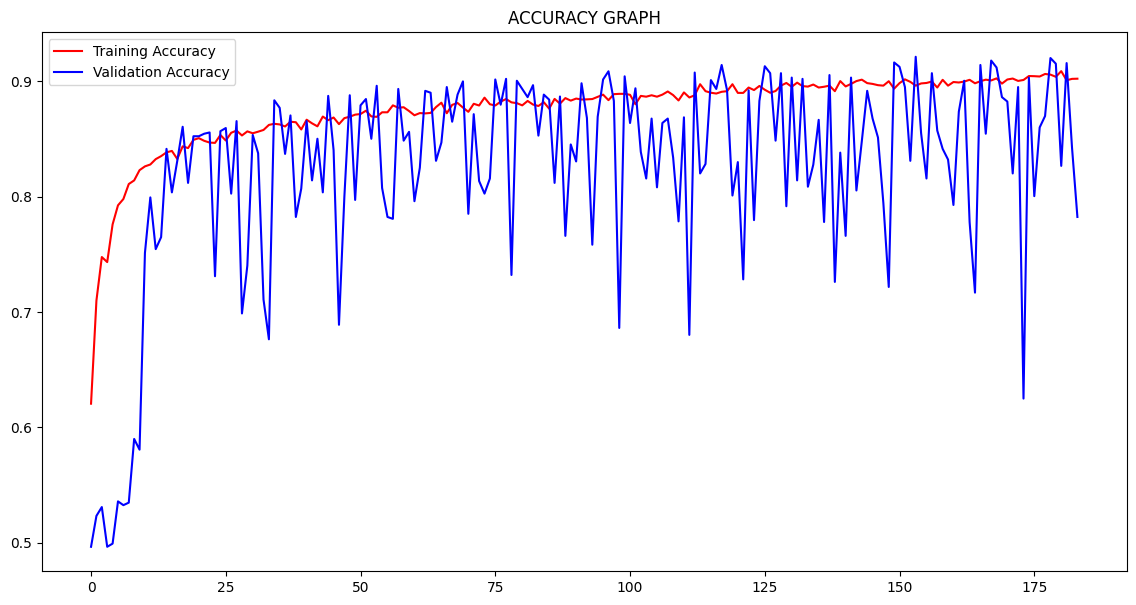

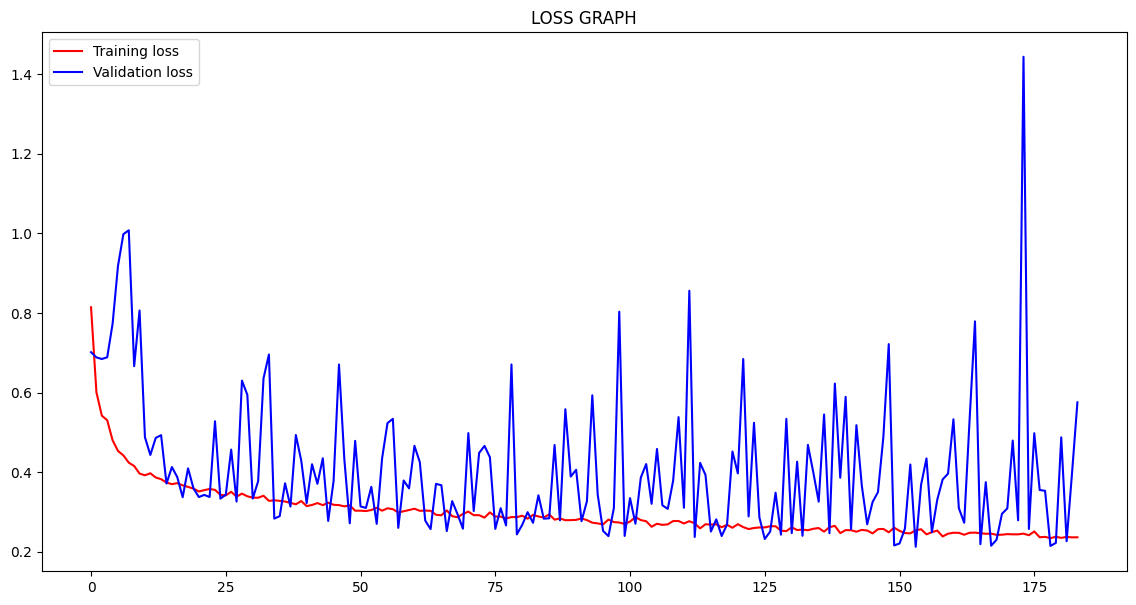

In [ ]:
eval_graph(CNN_results_1)

In [ ]:
Y_test1

,labels
6172,1
9810,1
8537,1
605,1
6549,0
...,...
4104,0
6374,0
6232,0
3950,0


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


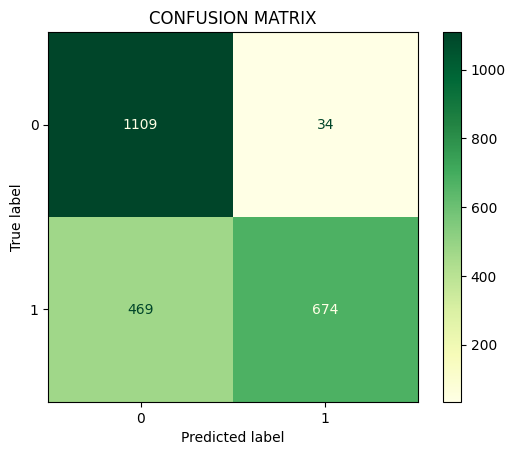

In [ ]:
conf_matrix(X_test1,Y_test1,CNN_model1)

# CNN MODEL ON SECOND DATASET

In [ ]:
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.9160 - loss: 0.2034
Epoch 1: val_loss improved from inf to 0.27194, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 821ms/step - accuracy: 0.9159 - loss: 0.2036 - val_accuracy: 0.8950 - val_loss: 0.2719
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 737ms/step - accuracy: 0.9131 - loss: 0.2131
Epoch 2: val_loss did not improve from 0.27194
58/58 ━━━━━━━━━━━━━━━━━━━━ 48s 828ms/step - accuracy: 0.9131 - loss: 0.2130 - val_accuracy: 0.8923 - val_loss: 0.3023
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.9202 - loss: 0.1933
Epoch 3: val_loss did not improve from 0.27194
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 780ms/step - accuracy: 0.9201 - loss: 0.1933 - val_accuracy: 0.9027 - val_loss: 0.2800
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.9219 - loss: 0.1908
Epoch 4: val_loss improved from 0.27194 to 0.26534, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 837ms/step - accuracy: 0.9220 - loss: 0.1907 - val_accuracy: 0.8885 - val_loss: 0.2653
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.9304 - loss: 0.1760
Epoch 5: val_loss improved from 0.26534 to 0.25737, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 800ms/step - accuracy: 0.9304 - loss: 0.1760 - val_accuracy: 0.9027 - val_loss: 0.2574
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.9357 - loss: 0.1624
Epoch 6: val_loss did not improve from 0.25737
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 779ms/step - accuracy: 0.9356 - loss: 0.1625 - val_accuracy: 0.8989 - val_loss: 0.2758
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.9327 - loss: 0.1595
Epoch 7: val_loss did not improve from 0.25737
58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 794ms/step - accuracy: 0.9326 - loss: 0.1597 - val_accuracy: 0.9010 - val_loss: 0.3072
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9344 - loss: 0.1524
Epoch 8: val_loss did not improve from 0.25737
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 793ms/step - accuracy: 0.9344 - loss: 0.1525 - val_accuracy: 0.9060 - val_loss: 0.2805
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 747ms/step - accuracy: 0.9383 - loss: 0.1497
Epoch 9: val_loss did not improve from 

In [ ]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.9234 - loss: 0.3090


[0.35769906640052795, 0.9125109314918518]

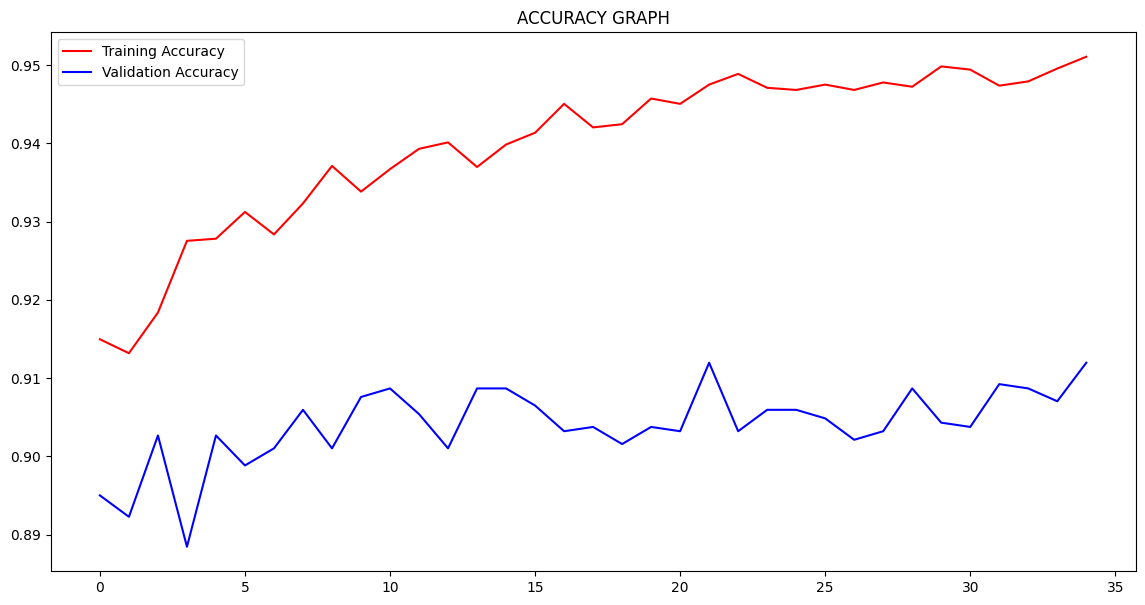

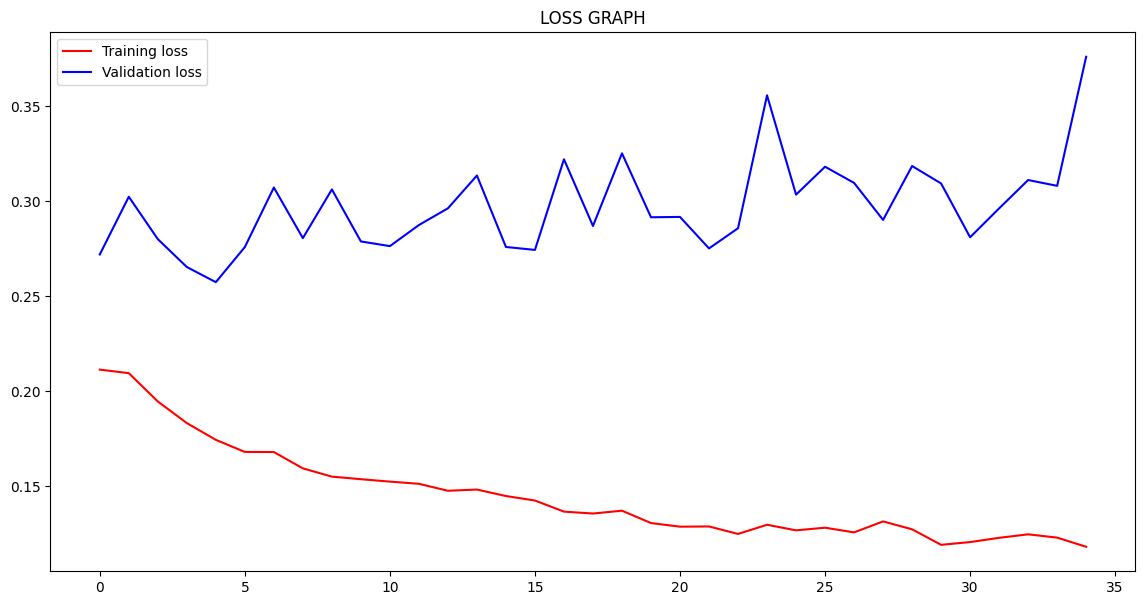

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step


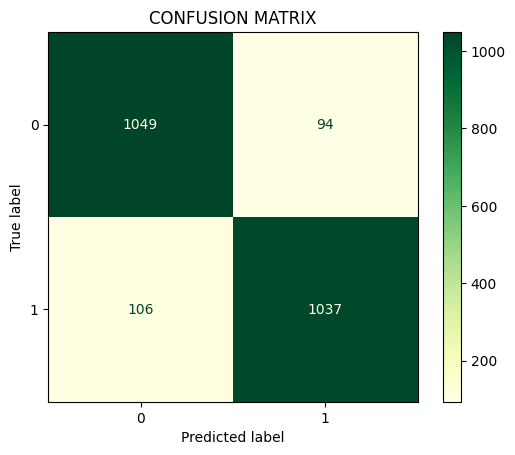

In [ ]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)

# CNN LSTM MODEL

In [ ]:
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))

    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)
CNN_LSTM_model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)              │ (None, 87, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 87, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 87, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 44, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 44, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 44, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 44, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 22, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 22, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 22, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 22, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 11, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_14 (Conv1D)              │ (None, 6, 256)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 6, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 6, 128)         │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 445,281 (1.70 MB)

 Trainable params: 444,289 (1.69 MB)

 Non-trainable params: 992 (3.88 KB)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_15 (Conv1D)              │ (None, 1000, 16)       │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 1000, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 1000, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 500, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 500, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 500, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 500, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_15 (MaxPooling1D) │ (None, 250, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 250, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 250, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_16 (MaxPooling1D) │ (None, 125, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 125, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 125, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 125, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_17 (MaxPooling1D) │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 63, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 63, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 63, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 63, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 63, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8064)           │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,379,169 (5.26 MB)

 Trainable params: 1,378,177 (5.26 MB)

 Non-trainable params: 992 (3.88 KB)

# CNN LSTM MODEL ON FIRST DATASET

In [ ]:
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5401 - loss: 0.6906
Epoch 1: val_loss improved from inf to 0.68525, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 129ms/step - accuracy: 0.5410 - loss: 0.6903 - val_accuracy: 0.5068 - val_loss: 0.6852
Epoch 2/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6531 - loss: 0.6298
Epoch 2: val_loss improved from 0.68525 to 0.68039, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.6542 - loss: 0.6288 - val_accuracy: 0.5806 - val_loss: 0.6804
Epoch 3/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7469 - loss: 0.5278
Epoch 3: val_loss improved from 0.68039 to 0.62828, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.7476 - loss: 0.5267 - val_accuracy: 0.6785 - val_loss: 0.6283
Epoch 4/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7970 - loss: 0.4532
Epoch 4: val_loss improved from 0.62828 to 0.59157, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.7970 - loss: 0.4530 - val_accuracy: 0.7217 - val_loss: 0.5916
Epoch 5/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8164 - loss: 0.4190
Epoch 5: val_loss did not improve from 0.59157
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8164 - loss: 0.4188 - val_accuracy: 0.5396 - val_loss: 0.6402
Epoch 6/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8244 - loss: 0.4060
Epoch 6: val_loss improved from 0.59157 to 0.48870, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8245 - loss: 0.4056 - val_accuracy: 0.8059 - val_loss: 0.4887
Epoch 7/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8288 - loss: 0.3860
Epoch 7: val_loss did not improve from 0.48870
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.8289 - loss: 0.3857 - val_accuracy: 0.7884 - val_loss: 0.4906
Epoch 8/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8395 - loss: 0.3736
Epoch 8: val_loss improved from 0.48870 to 0.42385, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8394 - loss: 0.3738 - val_accuracy: 0.8289 - val_loss: 0.4238
Epoch 9/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8384 - loss: 0.3687
Epoch 9: val_loss improved from 0.42385 to 0.40254, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8384 - loss: 0.3689 - val_accuracy: 0.8114 - val_loss: 0.4025
Epoch 10/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8392 - loss: 0.3712
Epoch 10: val_loss improved from 0.40254 to 0.39816, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8395 - loss: 0.3709 - val_accuracy: 0.8300 - val_loss: 0.3982
Epoch 11/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8393 - loss: 0.3613
Epoch 11: val_loss improved from 0.39816 to 0.37683, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8395 - loss: 0.3612 - val_accuracy: 0.8513 - val_loss: 0.3768
Epoch 12/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8496 - loss: 0.3575
Epoch 12: val_loss did not improve from 0.37683
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8495 - loss: 0.3576 - val_accuracy: 0.7769 - val_loss: 0.4679
Epoch 13/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8530 - loss: 0.3456
Epoch 13: val_loss improved from 0.37683 to 0.34708, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.8529 - loss: 0.3458 - val_accuracy: 0.8486 - val_loss: 0.3471
Epoch 14/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8403 - loss: 0.3692
Epoch 14: val_loss did not improve from 0.34708
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.8405 - loss: 0.3689 - val_accuracy: 0.8065 - val_loss: 0.4060
Epoch 15/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8576 - loss: 0.3372
Epoch 15: val_loss improved from 0.34708 to 0.32226, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8575 - loss: 0.3375 - val_accuracy: 0.8617 - val_loss: 0.3223
Epoch 16/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8583 - loss: 0.3379
Epoch 16: val_loss improved from 0.32226 to 0.30628, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.8583 - loss: 0.3379 - val_accuracy: 0.8677 - val_loss: 0.3063
Epoch 17/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8540 - loss: 0.3430
Epoch 17: val_loss did not improve from 0.30628
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - accuracy: 0.8542 - loss: 0.3429 - val_accuracy: 0.8770 - val_loss: 0.3131
Epoch 18/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8609 - loss: 0.3323
Epoch 18: val_loss did not improve from 0.30628
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.8607 - loss: 0.3326 - val_accuracy: 0.8562 - val_loss: 0.3156
Epoch 19/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8562 - loss: 0.3346
Epoch 19: val_loss improved from 0.30628 to 0.28539, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8562 - loss: 0.3348 - val_accuracy: 0.8748 - val_loss: 0.2854
Epoch 20/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8576 - loss: 0.3322
Epoch 20: val_loss did not improve from 0.28539
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8578 - loss: 0.3321 - val_accuracy: 0.8371 - val_loss: 0.3626
Epoch 21/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8657 - loss: 0.3248
Epoch 21: val_loss did not improve from 0.28539
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - accuracy: 0.8657 - loss: 0.3246 - val_accuracy: 0.8365 - val_loss: 0.3847
Epoch 22/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8690 - loss: 0.3094
Epoch 22: val_loss improved from 0.28539 to 0.28057, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.8689 - loss: 0.3097 - val_accuracy: 0.8917 - val_loss: 0.2806
Epoch 23/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8706 - loss: 0.3138
Epoch 23: val_loss did not improve from 0.28057
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 126ms/step - accuracy: 0.8705 - loss: 0.3141 - val_accuracy: 0.8814 - val_loss: 0.2865
Epoch 24/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8685 - loss: 0.3131
Epoch 24: val_loss improved from 0.28057 to 0.26784, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8684 - loss: 0.3133 - val_accuracy: 0.8890 - val_loss: 0.2678
Epoch 25/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8641 - loss: 0.3176
Epoch 25: val_loss did not improve from 0.26784
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8640 - loss: 0.3178 - val_accuracy: 0.8885 - val_loss: 0.2687
Epoch 26/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8704 - loss: 0.3137
Epoch 26: val_loss did not improve from 0.26784
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.8703 - loss: 0.3138 - val_accuracy: 0.8819 - val_loss: 0.2875
Epoch 27/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8729 - loss: 0.3021
Epoch 27: val_loss did not improve from 0.26784
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8728 - loss: 0.3026 - val_accuracy: 0.8896 - val_loss: 0.2734
Epoch 28/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8641 - loss: 0.3231
Epoch 28: val_loss did not improve from 0

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8676 - loss: 0.3250 - val_accuracy: 0.8928 - val_loss: 0.2636
Epoch 33/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8626 - loss: 0.3175
Epoch 33: val_loss improved from 0.26359 to 0.25439, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8629 - loss: 0.3171 - val_accuracy: 0.8939 - val_loss: 0.2544
Epoch 34/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8669 - loss: 0.3209
Epoch 34: val_loss did not improve from 0.25439
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8671 - loss: 0.3205 - val_accuracy: 0.8808 - val_loss: 0.2976
Epoch 35/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8663 - loss: 0.3109
Epoch 35: val_loss did not improve from 0.25439
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.8664 - loss: 0.3109 - val_accuracy: 0.8486 - val_loss: 0.3390
Epoch 36/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8776 - loss: 0.3058
Epoch 36: val_loss did not improve from 0.25439
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.8775 - loss: 0.3058 - val_accuracy: 0.7758 - val_loss: 0.4714
Epoch 37/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8747 - loss: 0.3014
Epoch 37: val_loss did not improve from 

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.8747 - loss: 0.2991 - val_accuracy: 0.8934 - val_loss: 0.2491
Epoch 44/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8767 - loss: 0.2823
Epoch 44: val_loss did not improve from 0.24905
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.8768 - loss: 0.2826 - val_accuracy: 0.8321 - val_loss: 0.3911
Epoch 45/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8879 - loss: 0.2834
Epoch 45: val_loss did not improve from 0.24905
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.8877 - loss: 0.2837 - val_accuracy: 0.8967 - val_loss: 0.2517
Epoch 46/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8839 - loss: 0.2879
Epoch 46: val_loss did not improve from 0.24905
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.8839 - loss: 0.2882 - val_accuracy: 0.8896 - val_loss: 0.2779
Epoch 47/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8745 - loss: 0.2979
Epoch 47: val_loss did not improve from 0

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.8904 - loss: 0.2765 - val_accuracy: 0.9027 - val_loss: 0.2483
Epoch 49/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8791 - loss: 0.2980
Epoch 49: val_loss did not improve from 0.24830
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.8790 - loss: 0.2980 - val_accuracy: 0.8956 - val_loss: 0.2569
Epoch 50/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8809 - loss: 0.2872
Epoch 50: val_loss did not improve from 0.24830
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8809 - loss: 0.2873 - val_accuracy: 0.8677 - val_loss: 0.3153
Epoch 51/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8766 - loss: 0.2910
Epoch 51: val_loss did not improve from 0.24830
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8767 - loss: 0.2907 - val_accuracy: 0.8999 - val_loss: 0.2604
Epoch 52/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8790 - loss: 0.2913
Epoch 52: val_loss did not improve from

58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.8882 - loss: 0.2774 - val_accuracy: 0.9005 - val_loss: 0.2477
Epoch 69/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8830 - loss: 0.2841
Epoch 69: val_loss improved from 0.24769 to 0.24518, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.8829 - loss: 0.2840 - val_accuracy: 0.9043 - val_loss: 0.2452
Epoch 70/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8848 - loss: 0.2722
Epoch 70: val_loss did not improve from 0.24518
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8849 - loss: 0.2723 - val_accuracy: 0.9010 - val_loss: 0.2531
Epoch 71/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8818 - loss: 0.2827
Epoch 71: val_loss did not improve from 0.24518
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8819 - loss: 0.2826 - val_accuracy: 0.9021 - val_loss: 0.2570
Epoch 72/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8793 - loss: 0.2809
Epoch 72: val_loss did not improve from 0.24518
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8793 - loss: 0.2811 - val_accuracy: 0.8999 - val_loss: 0.2583
Epoch 73/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8802 - loss: 0.2973
Epoch 73: val_loss improved from 0.24518 

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8803 - loss: 0.2970 - val_accuracy: 0.9032 - val_loss: 0.2412
Epoch 74/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.8836 - loss: 0.2764
Epoch 74: val_loss did not improve from 0.24122
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8834 - loss: 0.2768 - val_accuracy: 0.8923 - val_loss: 0.2693
Epoch 75/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8868 - loss: 0.2716
Epoch 75: val_loss did not improve from 0.24122
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.8867 - loss: 0.2719 - val_accuracy: 0.8715 - val_loss: 0.3105
Epoch 76/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8842 - loss: 0.2791
Epoch 76: val_loss did not improve from 0.24122
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 0.8843 - loss: 0.2790 - val_accuracy: 0.9016 - val_loss: 0.2452
Epoch 77/200
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8936 - loss: 0.2560
Epoch 77: val_loss did not improve from

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8709 - loss: 0.3054


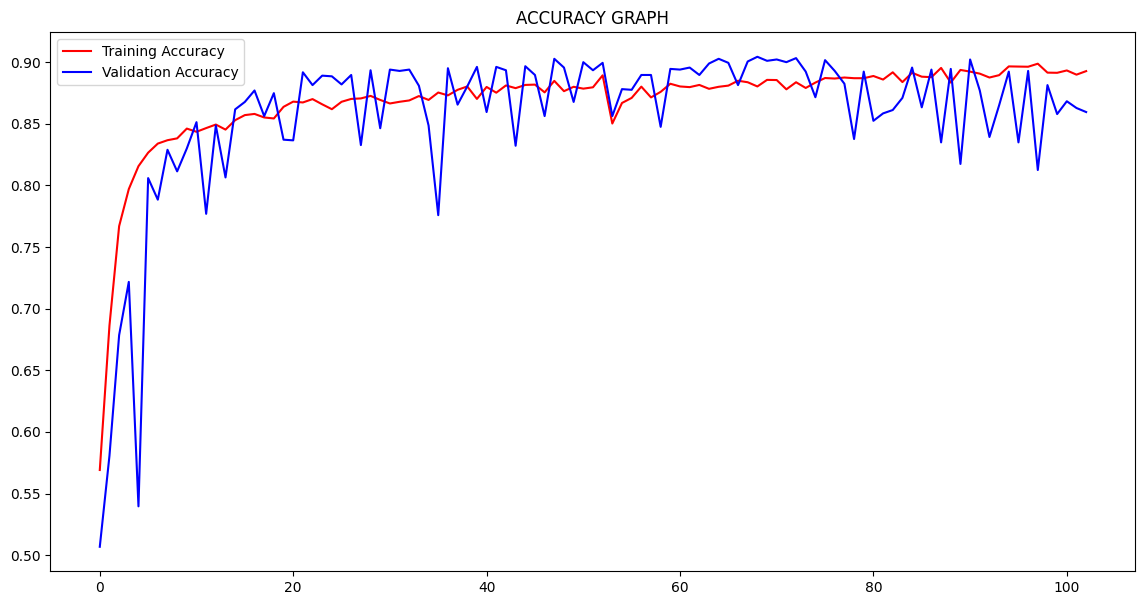

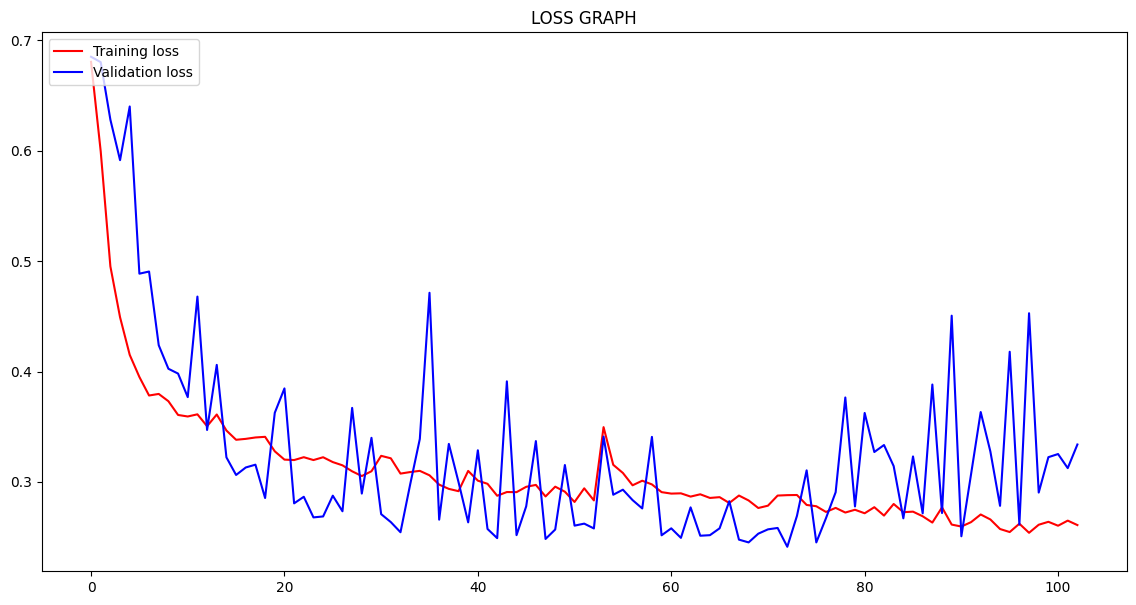

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


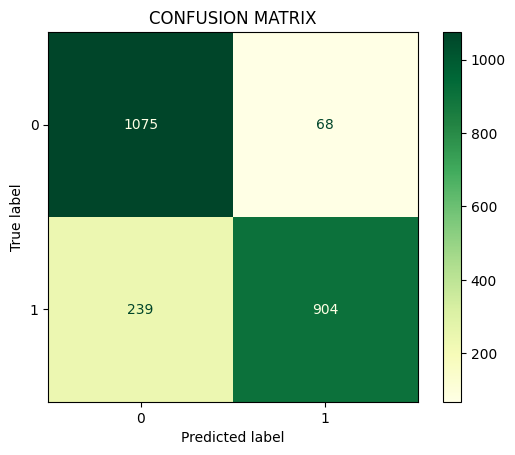

In [ ]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

# CNN LSTM MODEL ON SECOND DATASET

In [ ]:
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.6550 - loss: 0.6090
Epoch 1: val_loss improved from inf to 0.73857, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 888ms/step - accuracy: 0.6561 - loss: 0.6079 - val_accuracy: 0.5036 - val_loss: 0.7386
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.7947 - loss: 0.4567
Epoch 2: val_loss improved from 0.73857 to 0.69068, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 54s 937ms/step - accuracy: 0.7948 - loss: 0.4565 - val_accuracy: 0.6709 - val_loss: 0.6907
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.8186 - loss: 0.4152
Epoch 3: val_loss did not improve from 0.69068
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 901ms/step - accuracy: 0.8187 - loss: 0.4149 - val_accuracy: 0.5036 - val_loss: 0.7347
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8397 - loss: 0.3642
Epoch 4: val_loss did not improve from 0.69068
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 902ms/step - accuracy: 0.8397 - loss: 0.3642 - val_accuracy: 0.5036 - val_loss: 0.6986
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.8540 - loss: 0.3357
Epoch 5: val_loss improved from 0.69068 to 0.64163, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 898ms/step - accuracy: 0.8539 - loss: 0.3358 - val_accuracy: 0.6145 - val_loss: 0.6416
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.8641 - loss: 0.3092
Epoch 6: val_loss improved from 0.64163 to 0.58596, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 898ms/step - accuracy: 0.8641 - loss: 0.3092 - val_accuracy: 0.6922 - val_loss: 0.5860
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.8823 - loss: 0.2855
Epoch 7: val_loss improved from 0.58596 to 0.52687, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 924ms/step - accuracy: 0.8822 - loss: 0.2855 - val_accuracy: 0.7654 - val_loss: 0.5269
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.8854 - loss: 0.2686
Epoch 8: val_loss improved from 0.52687 to 0.45259, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 934ms/step - accuracy: 0.8854 - loss: 0.2687 - val_accuracy: 0.8032 - val_loss: 0.4526
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.8978 - loss: 0.2442
Epoch 9: val_loss improved from 0.45259 to 0.35390, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 905ms/step - accuracy: 0.8977 - loss: 0.2442 - val_accuracy: 0.8453 - val_loss: 0.3539
Epoch 10/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9072 - loss: 0.2241
Epoch 10: val_loss improved from 0.35390 to 0.31969, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 51s 879ms/step - accuracy: 0.9071 - loss: 0.2242 - val_accuracy: 0.8660 - val_loss: 0.3197
Epoch 11/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.9070 - loss: 0.2142
Epoch 11: val_loss improved from 0.31969 to 0.28949, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 53s 911ms/step - accuracy: 0.9069 - loss: 0.2144 - val_accuracy: 0.8764 - val_loss: 0.2895
Epoch 12/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.9162 - loss: 0.2095
Epoch 12: val_loss improved from 0.28949 to 0.27607, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 911ms/step - accuracy: 0.9161 - loss: 0.2096 - val_accuracy: 0.8770 - val_loss: 0.2761
Epoch 13/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 843ms/step - accuracy: 0.9132 - loss: 0.1961
Epoch 13: val_loss improved from 0.27607 to 0.26158, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 907ms/step - accuracy: 0.9132 - loss: 0.1961 - val_accuracy: 0.8945 - val_loss: 0.2616
Epoch 14/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.9244 - loss: 0.1918
Epoch 14: val_loss did not improve from 0.26158
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 906ms/step - accuracy: 0.9245 - loss: 0.1916 - val_accuracy: 0.8907 - val_loss: 0.2691
Epoch 15/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9257 - loss: 0.1723
Epoch 15: val_loss improved from 0.26158 to 0.25317, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 926ms/step - accuracy: 0.9256 - loss: 0.1725 - val_accuracy: 0.8956 - val_loss: 0.2532
Epoch 16/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.9308 - loss: 0.1704
Epoch 16: val_loss did not improve from 0.25317
58/58 ━━━━━━━━━━━━━━━━━━━━ 81s 906ms/step - accuracy: 0.9307 - loss: 0.1705 - val_accuracy: 0.8792 - val_loss: 0.2754
Epoch 17/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.9276 - loss: 0.1652
Epoch 17: val_loss did not improve from 0.25317
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 924ms/step - accuracy: 0.9276 - loss: 0.1652 - val_accuracy: 0.9076 - val_loss: 0.2571
Epoch 18/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.9256 - loss: 0.1753
Epoch 18: val_loss improved from 0.25317 to 0.25201, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 933ms/step - accuracy: 0.9256 - loss: 0.1753 - val_accuracy: 0.9065 - val_loss: 0.2520
Epoch 19/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9331 - loss: 0.1618
Epoch 19: val_loss did not improve from 0.25201
58/58 ━━━━━━━━━━━━━━━━━━━━ 80s 899ms/step - accuracy: 0.9331 - loss: 0.1618 - val_accuracy: 0.9010 - val_loss: 0.2665
Epoch 20/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.9345 - loss: 0.1546
Epoch 20: val_loss did not improve from 0.25201
58/58 ━━━━━━━━━━━━━━━━━━━━ 84s 927ms/step - accuracy: 0.9344 - loss: 0.1547 - val_accuracy: 0.9049 - val_loss: 0.2577
Epoch 21/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9414 - loss: 0.1445
Epoch 21: val_loss improved from 0.25201 to 0.25080, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5


58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 926ms/step - accuracy: 0.9413 - loss: 0.1447 - val_accuracy: 0.9071 - val_loss: 0.2508
Epoch 22/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9403 - loss: 0.1527
Epoch 22: val_loss did not improve from 0.25080
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 923ms/step - accuracy: 0.9403 - loss: 0.1527 - val_accuracy: 0.9049 - val_loss: 0.2564
Epoch 23/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.9418 - loss: 0.1464
Epoch 23: val_loss did not improve from 0.25080
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 925ms/step - accuracy: 0.9417 - loss: 0.1465 - val_accuracy: 0.9043 - val_loss: 0.2642
Epoch 24/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9436 - loss: 0.1347
Epoch 24: val_loss did not improve from 0.25080
58/58 ━━━━━━━━━━━━━━━━━━━━ 82s 923ms/step - accuracy: 0.9436 - loss: 0.1348 - val_accuracy: 0.9043 - val_loss: 0.2623
Epoch 25/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.9465 - loss: 0.1322
Epoch 25: val_loss did not impro

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.9220 - loss: 0.2705


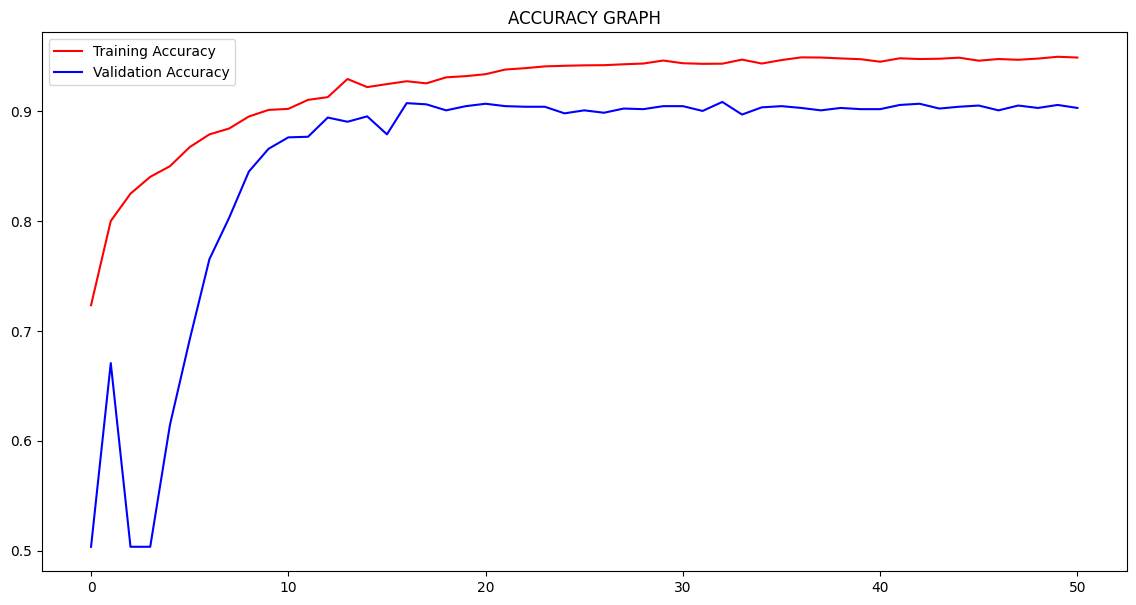

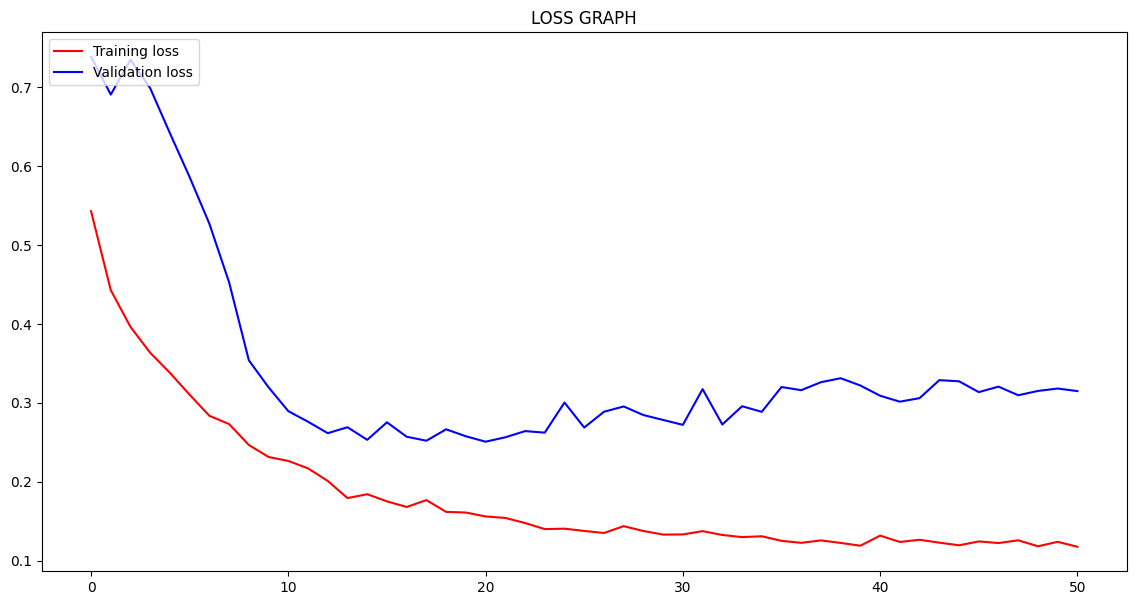

72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step


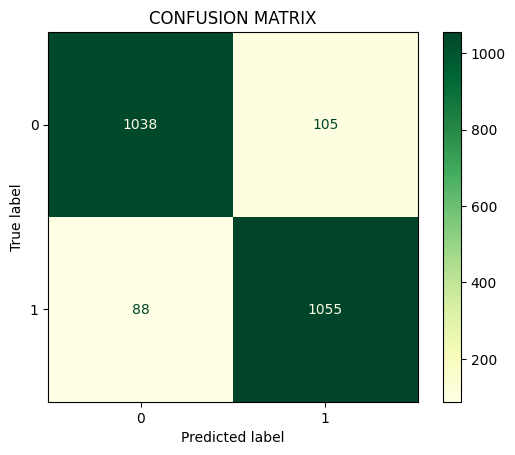

In [ ]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)